In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [46]:
DATA_PATH = "/content/drive/MyDrive/Dataton/data/"
DATA_PATH

'/content/drive/MyDrive/Dataton/data/'

- SEED 값

In [47]:
SEED = 42

- 데이터 불러오기

In [48]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습용 구매기록 데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트용 구매기록 데이터

train.shape, test.shape

((103904, 25), (25976, 25))

In [49]:
columns_map = {
    "id": "승객ID",
    "Gender": "성별",
    "Age": "나이",
    "Customer Type": "고객유형",
    "Type of Travel": "여행유형",
    "Class": "좌석등급",
    "Flight Distance": "비행거리",
    "Departure/Arrival time convenient": "시간편리성",
    "Departure Delay in Minutes": "출발지연",
    "Arrival Delay in Minutes": "도착지연",
    "Inflight wifi service": "기내와이파이",
    "Food and drink": "기내식",
    "Inflight entertainment": "기내엔터테인먼트",
    "On-board service": "탑승서비스",
    "Leg room service": "좌석공간",
    "Baggage handling": "수하물처리",
    "Checkin service": "체크인서비스",
    "Inflight service": "기내서비스",
    "Cleanliness": "청결도",
    "satisfaction": "만족도",
    "Ease of Online booking": "온라인_예약편의성",
    "Gate location": "탑승구_위치",
    "Online boarding": "온라인_탑승수속",
    "Seat comfort": "좌석편안함"
}

value_mappings = {
    "성별": {"Male": "남성", "Female": "여성"},
    "고객유형": {"Loyal Customer": "충성고객", "disloyal Customer": "비충성고객"},
    "여행유형": {"Business travel": "출장", "Personal Travel": "개인"},
    "좌석등급": {"Eco": "이코노미", "Eco Plus": "이코노미 플러스", "Business": "비즈니스"},
    "만족도": {"satisfied": "만족", "neutral or dissatisfied": "중립 또는 불만족"}
}

# 데이터 처리 함수
def process_data(data):
    data.rename(columns=columns_map, inplace=True)
    for column, mapping in value_mappings.items():
        if column in data.columns:
            data[column] = data[column].map(mapping)
    data.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")
    return data

# 데이터 처리
train = process_data(train)
test = process_data(test)

In [50]:
from IPython.display import display, HTML
br_html = HTML("<br><br>")
display(HTML("<h1>학습용 구매기록 데이터</h1>"), train.head(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"), test.head(), br_html)

,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,온라인_예약편의성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,70172,남성,충성고객,13,개인,이코노미 플러스,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,중립 또는 불만족
1,5047,남성,비충성고객,25,출장,비즈니스,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,중립 또는 불만족
2,110028,여성,충성고객,26,출장,비즈니스,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,만족
3,24026,여성,충성고객,25,출장,비즈니스,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,중립 또는 불만족
4,119299,남성,충성고객,61,출장,비즈니스,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,만족


,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,온라인_예약편의성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,19556,여성,충성고객,52,출장,이코노미,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,만족
1,90035,여성,충성고객,36,출장,비즈니스,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,만족
2,12360,남성,비충성고객,20,출장,이코노미,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,중립 또는 불만족
3,77959,남성,충성고객,44,출장,비즈니스,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,만족
4,36875,여성,충성고객,49,출장,이코노미,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,만족


In [51]:
display(HTML("<h1>학습용 구매기록 데이터</h1>"))
display(train.info(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"))
display(test.info(), br_html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   승객ID       103904 non-null  int64  
 1   성별         103904 non-null  object 
 2   고객유형       103904 non-null  object 
 3   나이         103904 non-null  int64  
 4   여행유형       103904 non-null  object 
 5   좌석등급       103904 non-null  object 
 6   비행거리       103904 non-null  int64  
 7   기내와이파이     103904 non-null  int64  
 8   시간편리성      103904 non-null  int64  
 9   온라인_예약편의성  103904 non-null  int64  
 10  탑승구_위치     103904 non-null  int64  
 11  기내식        103904 non-null  int64  
 12  온라인_탑승수속   103904 non-null  int64  
 13  좌석편안함      103904 non-null  int64  
 14  기내엔터테인먼트   103904 non-null  int64  
 15  탑승서비스      103904 non-null  int64  
 16  좌석공간       103904 non-null  int64  
 17  수하물처리      103904 non-null  int64  
 18  체크인서비스     103904 non-null  int64  
 19  기내서비스      103904 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   승객ID       25976 non-null  int64  
 1   성별         25976 non-null  object 
 2   고객유형       25976 non-null  object 
 3   나이         25976 non-null  int64  
 4   여행유형       25976 non-null  object 
 5   좌석등급       25976 non-null  object 
 6   비행거리       25976 non-null  int64  
 7   기내와이파이     25976 non-null  int64  
 8   시간편리성      25976 non-null  int64  
 9   온라인_예약편의성  25976 non-null  int64  
 10  탑승구_위치     25976 non-null  int64  
 11  기내식        25976 non-null  int64  
 12  온라인_탑승수속   25976 non-null  int64  
 13  좌석편안함      25976 non-null  int64  
 14  기내엔터테인먼트   25976 non-null  int64  
 15  탑승서비스      25976 non-null  int64  
 16  좌석공간       25976 non-null  int64  
 17  수하물처리      25976 non-null  int64  
 18  체크인서비스     25976 non-null  int64  
 19  기내서비스      25976 non-null  int64  
 20  청결도   

None

- 타겟 데이터

In [52]:
target = (train['만족도'] == '만족').astype(int)
target

,만족도
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [53]:
train_ft = train.drop(columns=['만족도', '승객ID']).copy()

In [54]:
train_ft = train.drop(columns=['만족도', '승객ID']).copy()
test_ft = test.drop(columns=['만족도', '승객ID']).copy()

In [55]:
train_ft["도착지연"] = train_ft["도착지연"].fillna(0)
test_ft["도착지연"] = test_ft["도착지연"].fillna(0)

In [56]:
train_ft.isnull().sum(), test_ft.isnull().sum()

(성별           0
 고객유형         0
 나이           0
 여행유형         0
 좌석등급         0
 비행거리         0
 기내와이파이       0
 시간편리성        0
 온라인_예약편의성    0
 탑승구_위치       0
 기내식          0
 온라인_탑승수속     0
 좌석편안함        0
 기내엔터테인먼트     0
 탑승서비스        0
 좌석공간         0
 수하물처리        0
 체크인서비스       0
 기내서비스        0
 청결도          0
 출발지연         0
 도착지연         0
 dtype: int64,
 성별           0
 고객유형         0
 나이           0
 여행유형         0
 좌석등급         0
 비행거리         0
 기내와이파이       0
 시간편리성        0
 온라인_예약편의성    0
 탑승구_위치       0
 기내식          0
 온라인_탑승수속     0
 좌석편안함        0
 기내엔터테인먼트     0
 탑승서비스        0
 좌석공간         0
 수하물처리        0
 체크인서비스       0
 기내서비스        0
 청결도          0
 출발지연         0
 도착지연         0
 dtype: int64)

# 특성 공학(Feature Engineering)

```
 0   승객ID       103904 non-null  int64  
 1   성별         103904 non-null  object
 2   고객유형       103904 non-null  object
 3   나이         103904 non-null  int64  
 4   여행유형       103904 non-null  object
 5   좌석등급       103904 non-null  object
 6   비행거리       103904 non-null  int64  
 7   기내와이파이     103904 non-null  int64  
 8   시간편리성      103904 non-null  int64  
 9   온라인 예약편의성  103904 non-null  int64  
 10  탑승구 위치     103904 non-null  int64  
 11  기내식        103904 non-null  int64  
 12  온라인 탑승수속   103904 non-null  int64  
 13  좌석편안함      103904 non-null  int64  
 14  기내엔터테인먼트   103904 non-null  int64  
 15  탑승서비스      103904 non-null  int64  
 16  좌석공간       103904 non-null  int64  
 17  수하물처리      103904 non-null  int64  
 18  체크인서비스     103904 non-null  int64  
 19  기내서비스      103904 non-null  int64  
 20  청결도        103904 non-null  int64  
 21  출발지연       103904 non-null  int64  
 22  도착지연       103594 non-null  float64
```

In [57]:
def add_age_groups_and_ranges(train, test):
    # 세대 생성
    bins_age = [0, 18, 30, 50, 65, 100]
    labels_age = ['미성년', '청년', '중년', '장년', '노년']
    train['세대'] = pd.cut(train['나이'], bins=bins_age, labels=labels_age, right=False)
    test['세대'] = pd.cut(test['나이'], bins=bins_age, labels=labels_age, right=False)

    # 연령대 생성
    bins_range = list(range(0, 101, 10))
    labels_range = ['10대 미만'] + [f"{i}대" for i in range(10, 100, 10)]
    train['연령대'] = pd.cut(train['나이'], bins=bins_range, labels=labels_range, right=False)
    test['연령대'] = pd.cut(test['나이'], bins=bins_range, labels=labels_range, right=False)

    return train, test


train_ft, test_ft = add_age_groups_and_ranges(train_ft, test_ft)

# 인코딩

In [58]:
train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   성별         103904 non-null  object  
 1   고객유형       103904 non-null  object  
 2   나이         103904 non-null  int64   
 3   여행유형       103904 non-null  object  
 4   좌석등급       103904 non-null  object  
 5   비행거리       103904 non-null  int64   
 6   기내와이파이     103904 non-null  int64   
 7   시간편리성      103904 non-null  int64   
 8   온라인_예약편의성  103904 non-null  int64   
 9   탑승구_위치     103904 non-null  int64   
 10  기내식        103904 non-null  int64   
 11  온라인_탑승수속   103904 non-null  int64   
 12  좌석편안함      103904 non-null  int64   
 13  기내엔터테인먼트   103904 non-null  int64   
 14  탑승서비스      103904 non-null  int64   
 15  좌석공간       103904 non-null  int64   
 16  수하물처리      103904 non-null  int64   
 17  체크인서비스     103904 non-null  int64   
 18  기내서비스      103904 non-null  int64   
 19  청결

## OneHot

In [59]:
cols = [col for col in train_ft.columns if train_ft[col].dtype in ['object', 'category']]
cols

['성별', '고객유형', '여행유형', '좌석등급', '세대', '연령대']

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [61]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols]).toarray()
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols]).toarray()

In [62]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [63]:
train_ft.head()

,나이,비행거리,기내와이파이,시간편리성,온라인_예약편의성,탑승구_위치,기내식,온라인_탑승수속,좌석편안함,기내엔터테인먼트,...,세대_청년,연령대_10대,연령대_10대 미만,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대,연령대_80대
0,13,460,3,4,3,1,5,3,5,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,235,3,2,3,3,1,3,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 스케일링

## MinMax

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [65]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

In [66]:
train_ft.to_csv(f"{DATA_PATH}train_age.csv",index=False)

In [67]:
test_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   나이             25976 non-null  float64
 1   비행거리           25976 non-null  float64
 2   기내와이파이         25976 non-null  float64
 3   시간편리성          25976 non-null  float64
 4   온라인_예약편의성      25976 non-null  float64
 5   탑승구_위치         25976 non-null  float64
 6   기내식            25976 non-null  float64
 7   온라인_탑승수속       25976 non-null  float64
 8   좌석편안함          25976 non-null  float64
 9   기내엔터테인먼트       25976 non-null  float64
 10  탑승서비스          25976 non-null  float64
 11  좌석공간           25976 non-null  float64
 12  수하물처리          25976 non-null  float64
 13  체크인서비스         25976 non-null  float64
 14  기내서비스          25976 non-null  float64
 15  청결도            25976 non-null  float64
 16  출발지연           25976 non-null  float64
 17  도착지연           25976 non-null  float64
 18  성별_남성 

# 모델

In [68]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=SEED)

## RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=SEED, max_features=None)
scores = cross_val_score(model, train_ft,target, cv= cv , n_jobs=-1, scoring="f1_macro")
scores.mean()

0.9606913270337472

# XAI

In [70]:
model.fit(train_ft, target)

RandomForestClassifier(max_features=None, random_state=42)

In [71]:
import shap

In [72]:
explainer = shap.TreeExplainer(model)

In [73]:
shap_values = explainer.shap_values(test_ft)
shap_values

array([[[-2.06111589e-03,  2.06111589e-03],
        [-3.74120214e-03,  3.74120214e-03],
        [-2.31404302e-01,  2.31404302e-01],
        ...,
        [-4.56354411e-05,  4.56354411e-05],
        [-1.76282876e-04,  1.76282876e-04],
        [-1.29767071e-04,  1.29767071e-04]],

       [[ 7.67878017e-03, -7.67878017e-03],
        [-5.30579922e-03,  5.30579922e-03],
        [-8.30350628e-02,  8.30350628e-02],
        ...,
        [-1.58253644e-06,  1.58253644e-06],
        [-2.02916746e-05,  2.02916746e-05],
        [-7.32450757e-06,  7.32450757e-06]],

       [[-2.62918578e-03,  2.62918578e-03],
        [ 4.71011846e-04, -4.71011846e-04],
        [ 9.98852498e-02, -9.98852498e-02],
        ...,
        [ 4.04908155e-05, -4.04908155e-05],
        [ 2.33176960e-06, -2.33176960e-06],
        [-8.72304681e-06,  8.72304681e-06]],

       ...,

       [[ 2.21515027e-03, -2.21515027e-03],
        [-6.55489770e-04,  6.55489770e-04],
        [ 9.10893461e-02, -9.10893461e-02],
        ...,
     

In [74]:
shap_values.shape

(25976, 41, 2)

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
shap_values_indexing = shap_values[:, :, 1]

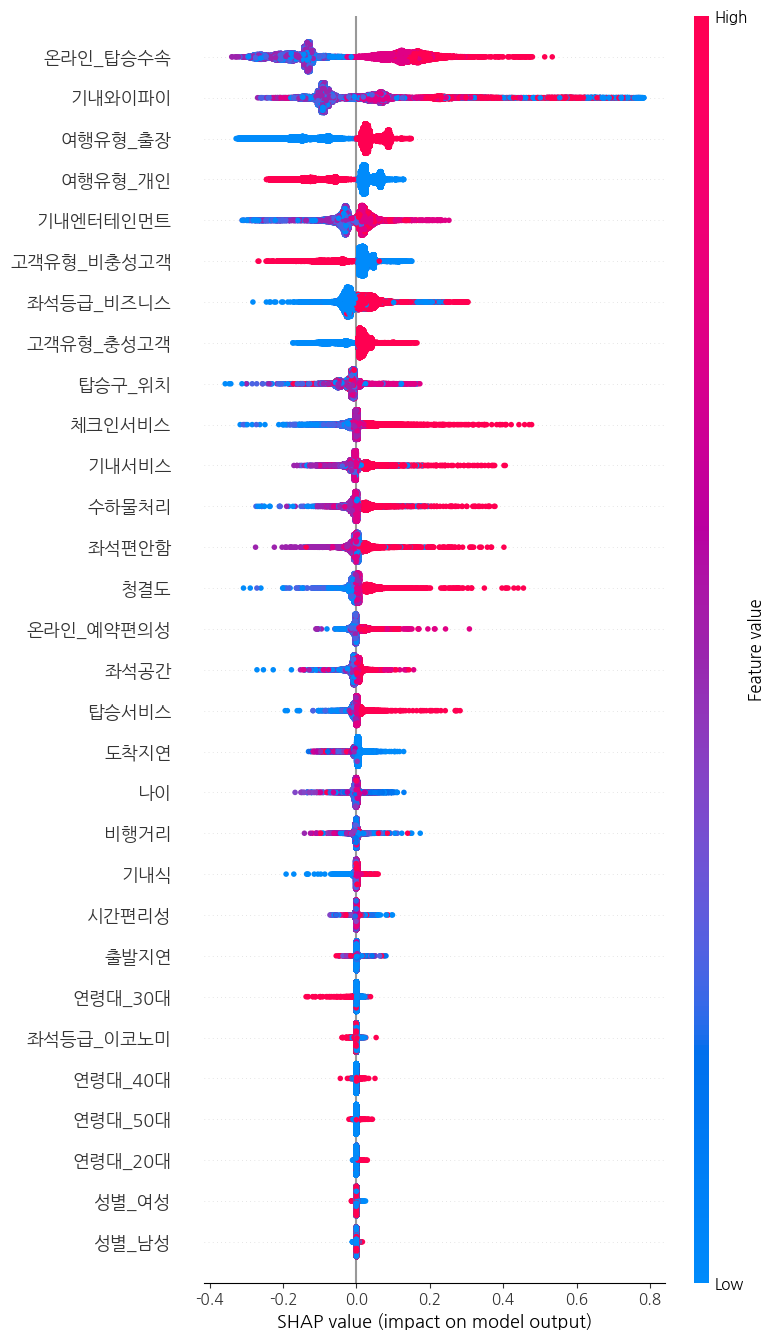

In [ ]:
shap.summary_plot(shap_values_indexing, test_ft, max_display=30)

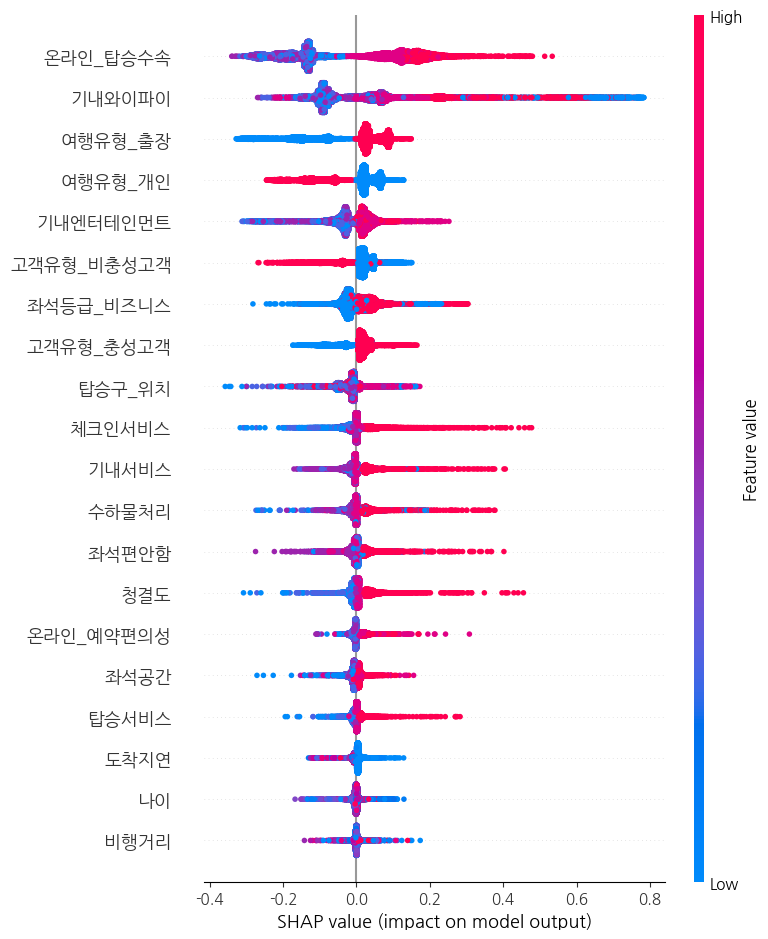

In [ ]:
shap.summary_plot(shap_values_indexing, test_ft)

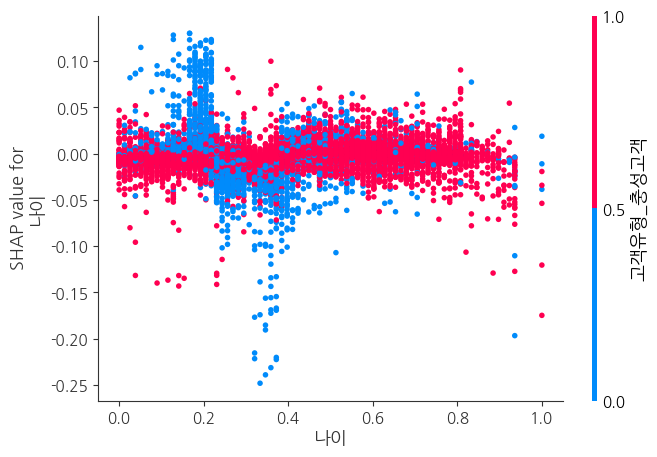

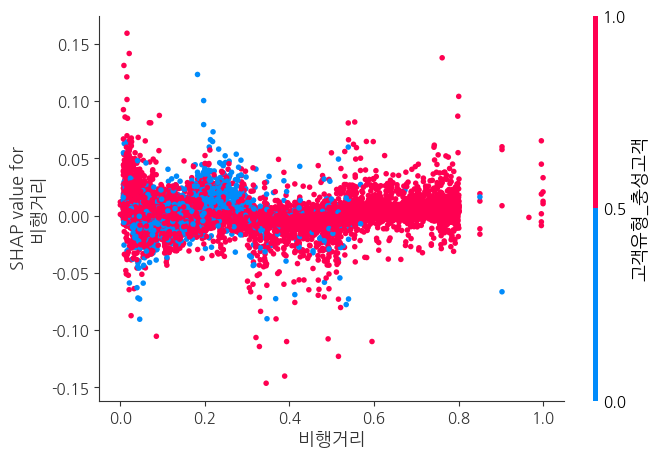

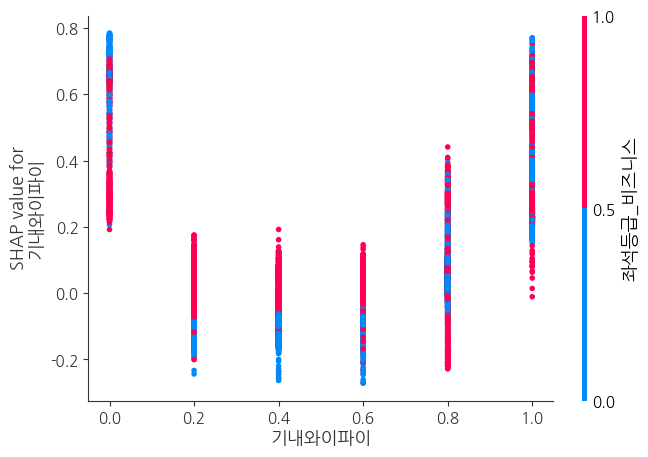

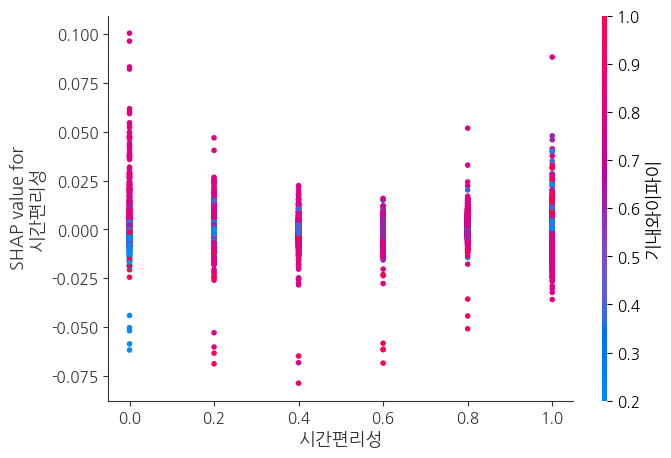

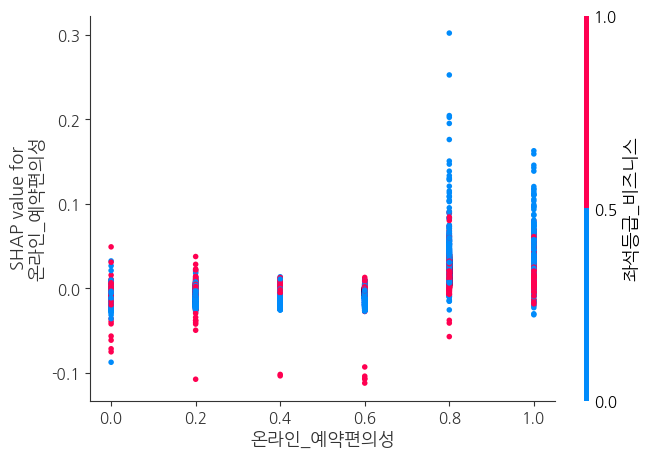

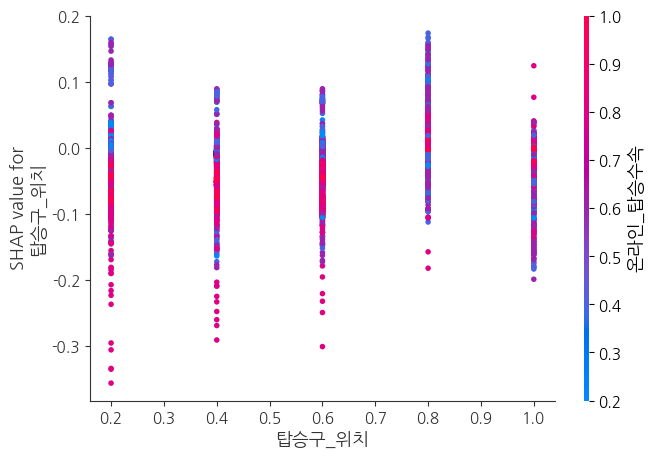

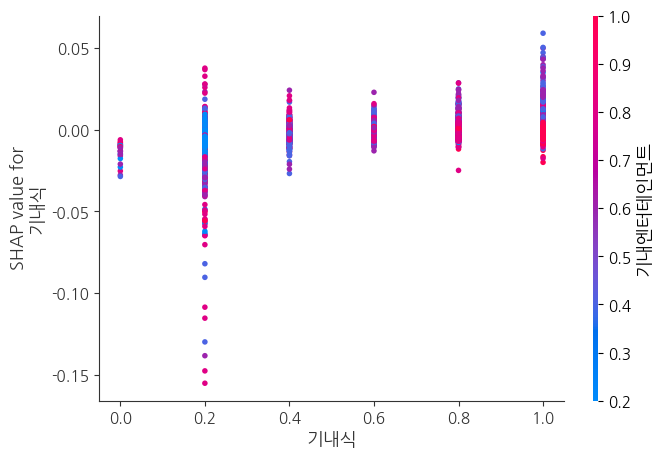

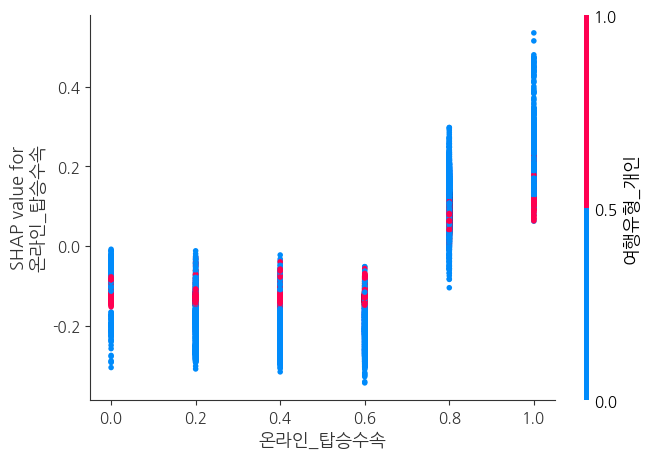

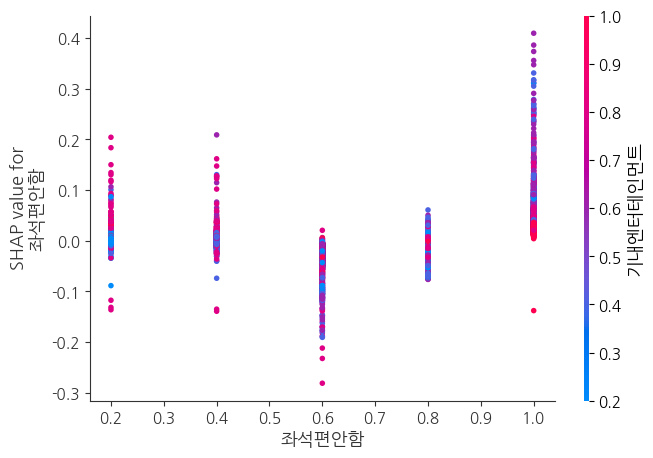

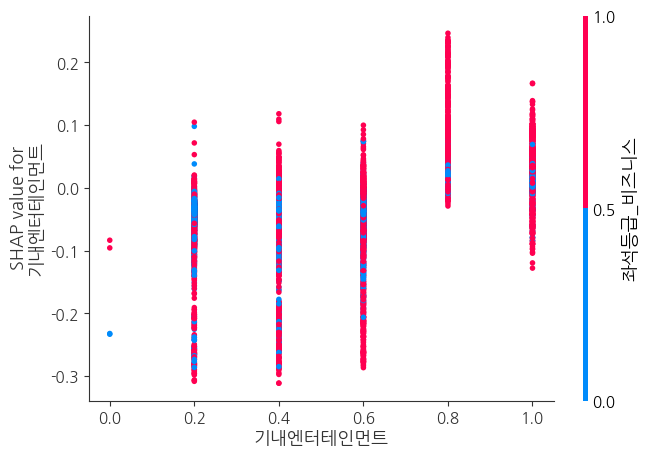

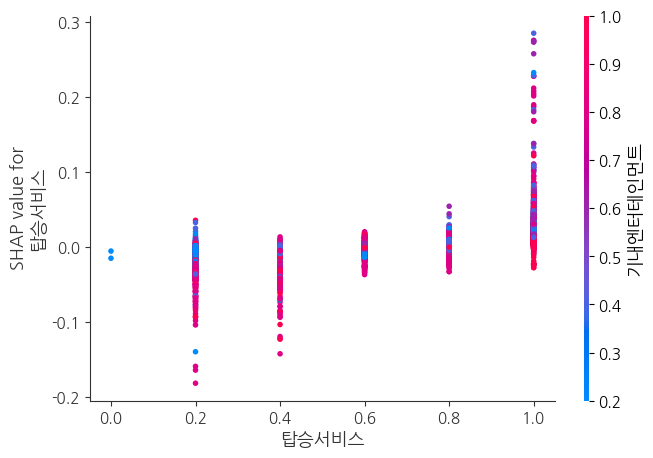

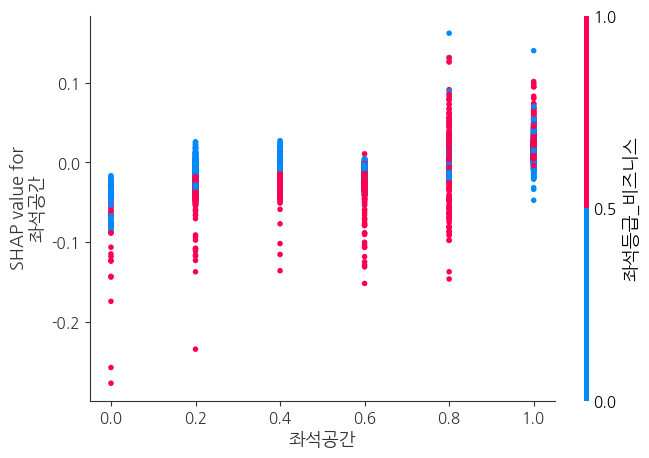

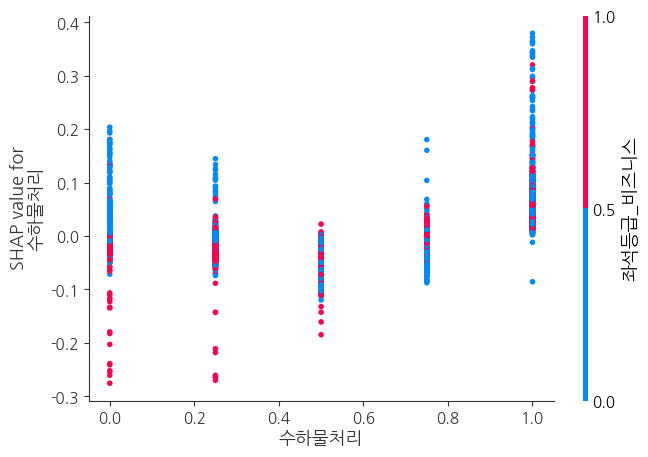

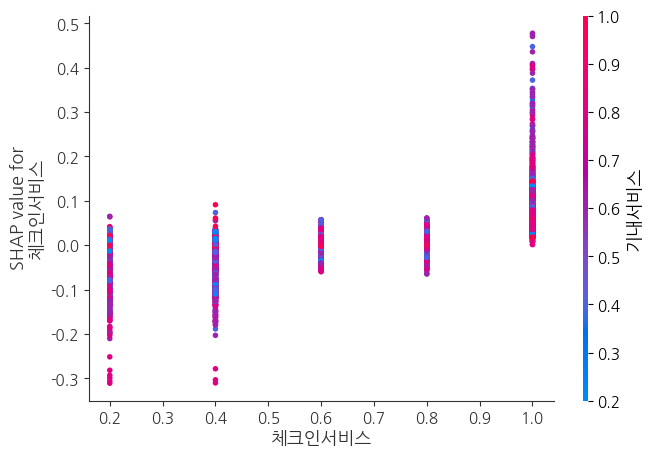

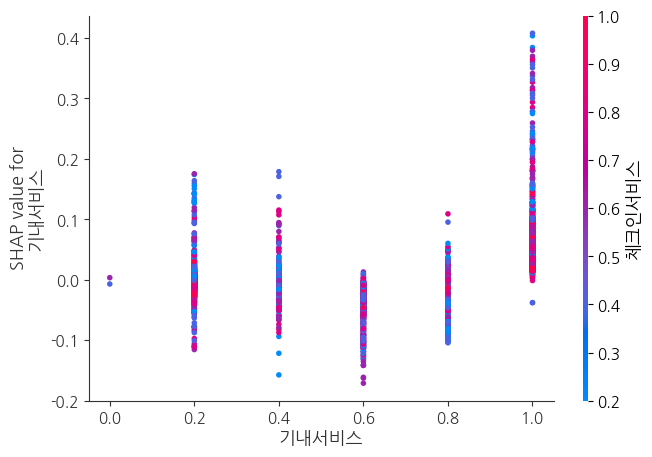

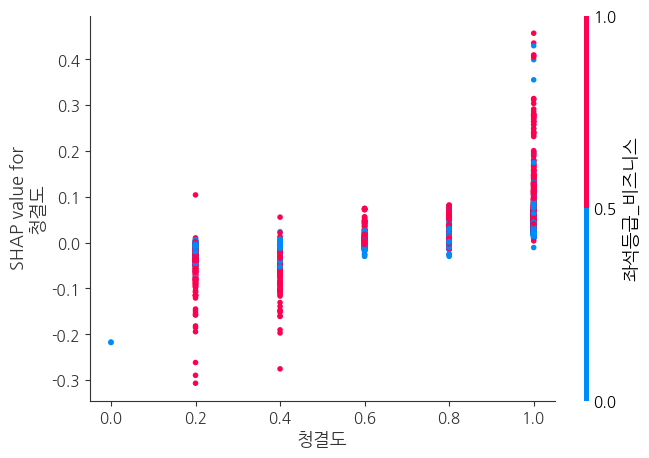

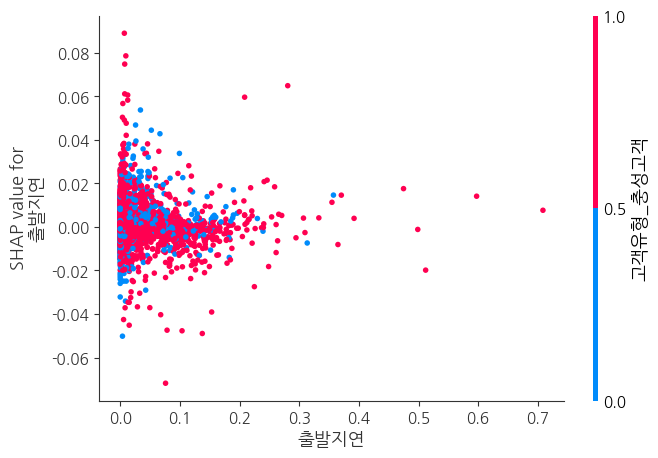

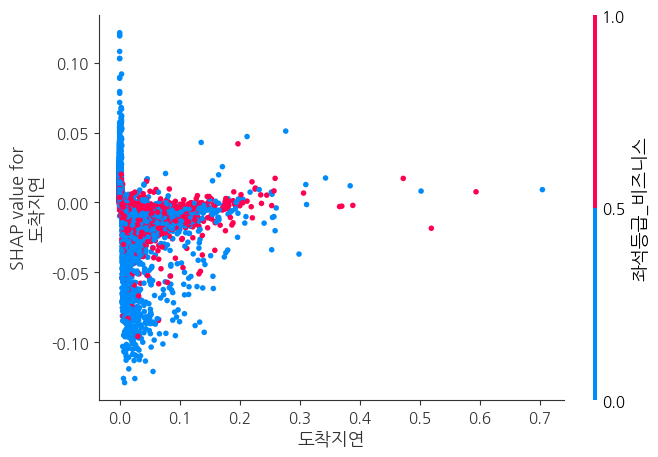

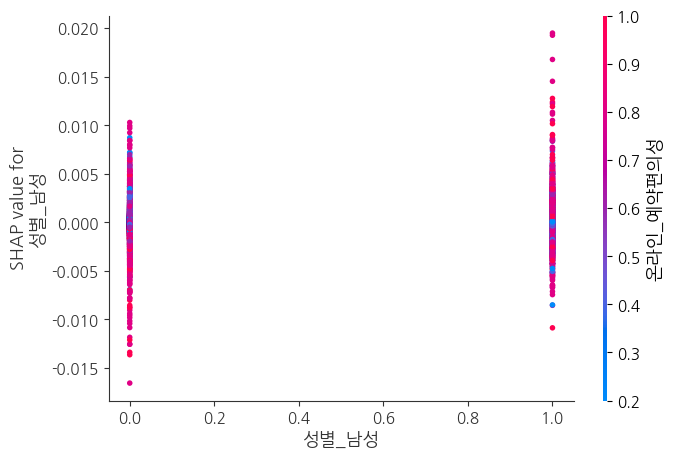

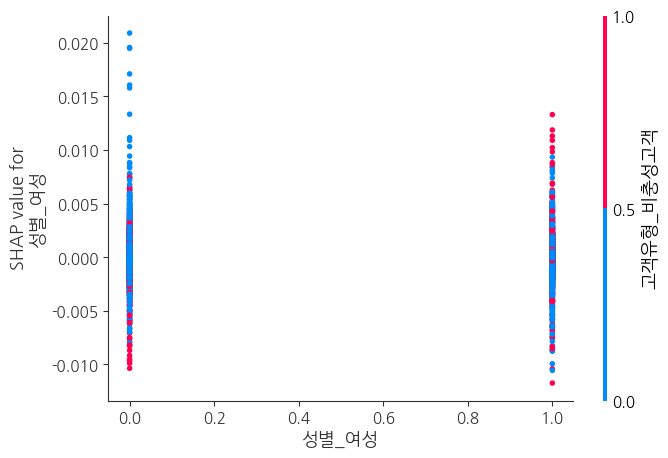

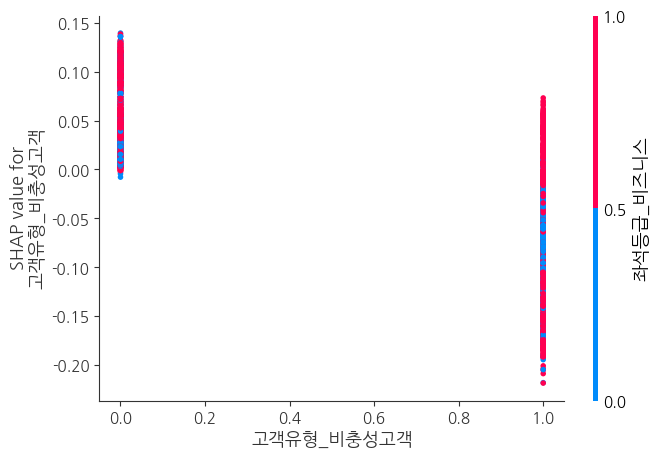

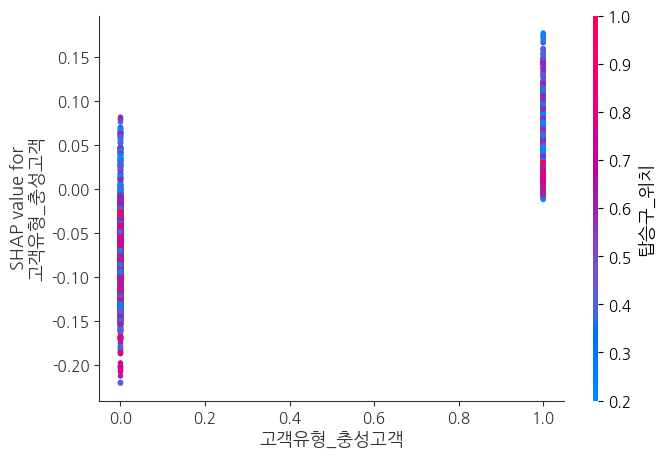

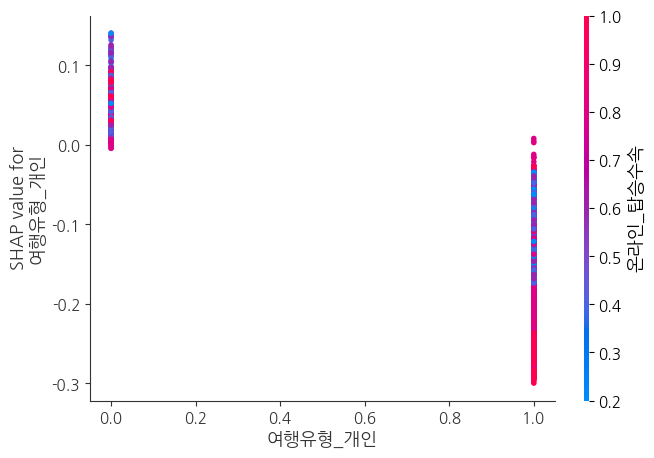

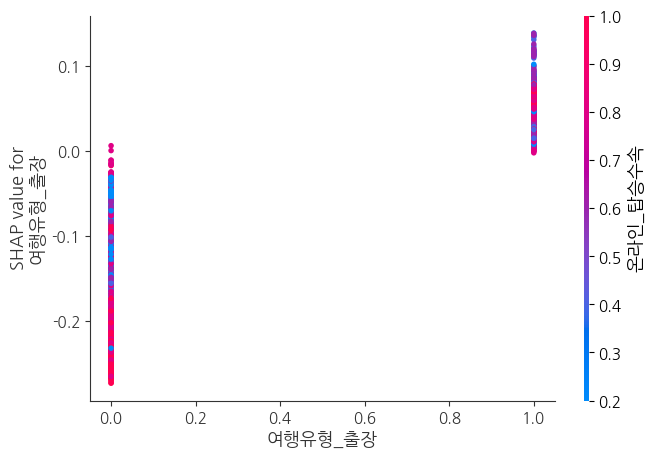

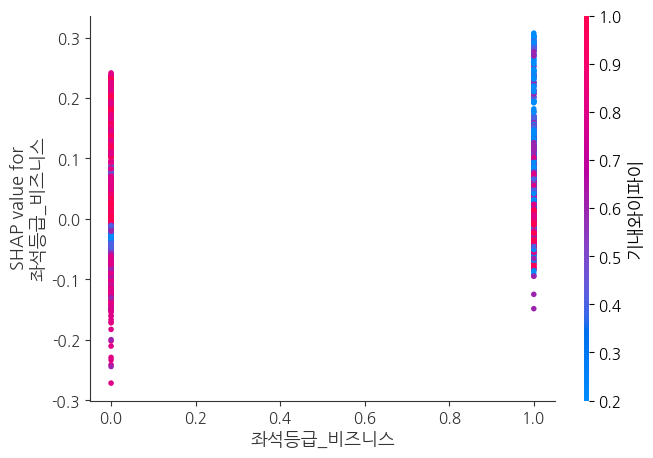

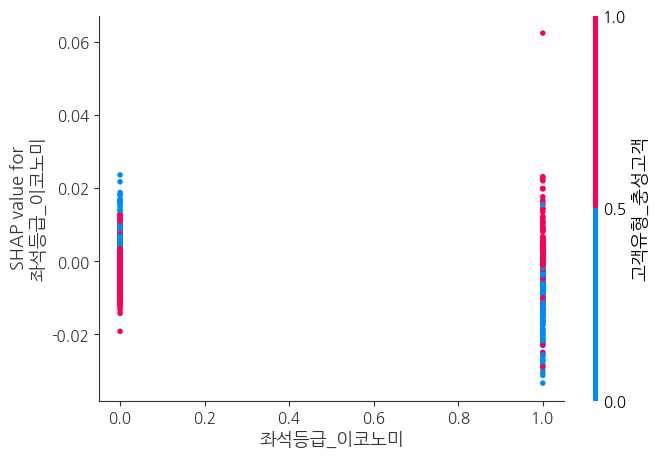

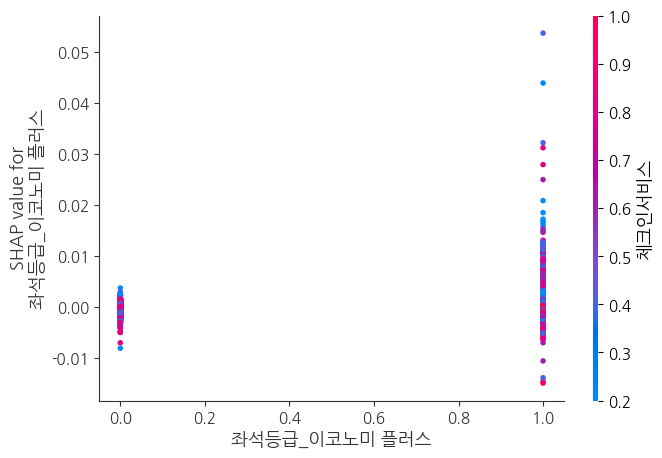

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values_indexing, test_ft)
    print()

# 항상 확인하기
- 학습데이터와 테스트 데이터의 피처개수는 동일해야 함

In [ ]:
train_ft.shape

# 추출한 피처 저장하기

In [ ]:
train_ft.shape

(103904, 27)

In [ ]:
train_ft.to_csv(f"{DATA_PATH}train_preprocessing.csv",index=False)
# test_ft.to_csv(f"{DATA_PATH}test_common.csv",index=False)

In [ ]:
target.to_csv(f"{DATA_PATH}target.csv",index=False)